
**Total: 200 Marks**

# ☕ Coffee Shop Revenue Prediction - Regression Models

Welcome! This assignment is designed to help you explore and implement various regression algorithms to predict daily revenue for coffee shops. Follow the instructions below and answer each question with both code and explanations where required.

---

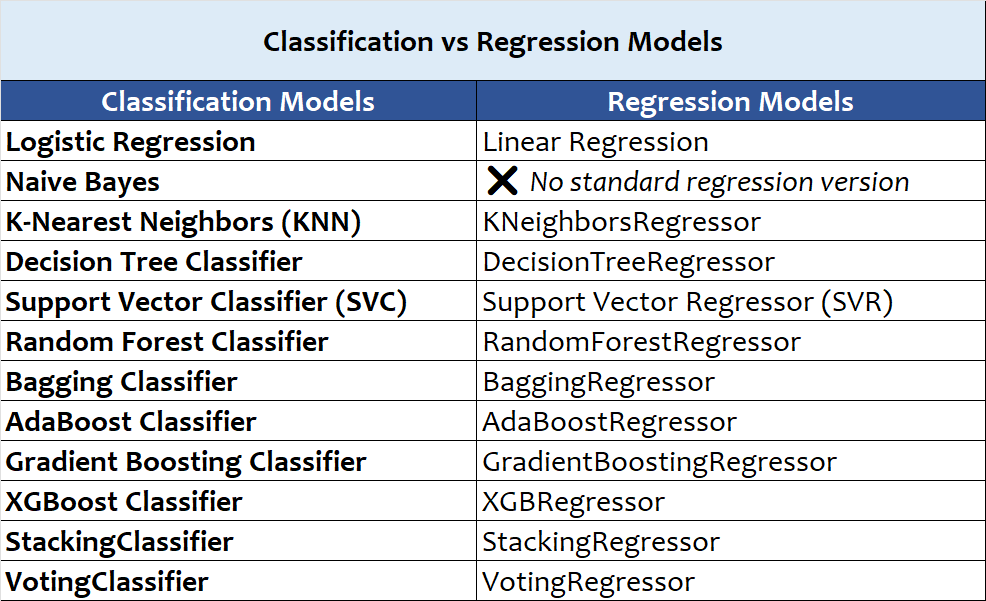

In [32]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
)
from xgboost import XGBRegressor

# Data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base regressors
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
}

# Stacking and Voting
stacking = StackingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
], final_estimator=LinearRegression())

voting = VotingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
])

# Add ensemble models
models["Stacking"] = stacking
models["Voting"] = voting

# Evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} - MSE: {mse:.4f}")


Linear Regression - MSE: 0.0119
KNN - MSE: 13356.7250
Decision Tree - MSE: 20064.0347
SVR - MSE: 33408.9220
Random Forest - MSE: 7369.9945
Bagging - MSE: 8762.3171
AdaBoost - MSE: 7816.9099
Gradient Boosting - MSE: 2717.3675
XGBoost - MSE: 5797.9292
Stacking - MSE: 2139.4284
Voting - MSE: 4443.4152


#  Coffee Shop Revenue Dataset

##  About Dataset

This dataset contains **2,000 rows** of data from coffee shops, offering detailed insights into factors that influence **daily revenue**.  
It includes key operational and environmental variables that provide a comprehensive view of how business activities and external conditions affect sales performance.

Designed for use in **predictive analytics and business optimization**, this dataset is a valuable resource for anyone looking to understand the relationship between **customer behavior**, **operational decisions**, and **revenue generation** in the **food and beverage industry**.

---

##  Columns & Variables

The dataset features a variety of columns capturing **operational details**, **customer activity**, and **external factors** such as **marketing spend** and **location foot traffic**.

### 1. `Number of Customers Per Day`
- The total number of customers visiting the coffee shop on any given day.
- **Range:** 50 - 500 customers

### 2. `Average Order Value ($)`
- The average dollar amount spent by each customer during their visit.
- **Range:** $2.50 - $10.00

### 3. `Operating Hours Per Day`
- The total number of hours the coffee shop is open for business each day.
- **Range:** 6 - 18 hours

### 4. `Number of Employees`
- The number of employees working on a given day.
- Can influence service speed, customer satisfaction, and ultimately, sales.
- **Range:** 2 - 15 employees

### 5. `Marketing Spend Per Day ($)`
- The amount of money spent on marketing campaigns or promotions on any given day.
- **Range:** $10 - $500 per day

### 6. `Location Foot Traffic (people/hour)`
- The number of people passing by the coffee shop per hour.
- Indicative of the shop's **location quality** and **potential customer base**.
- **Range:** 50 - 1000 people/hour

---

##  Target Variable

### `Daily Revenue ($)`
- The **dependent variable** representing the total revenue generated by the coffee shop each day.
- It is influenced by customer visits, average spending, marketing spend, and staff availability.
- **Range:** $200 - $10,000 per day




##  1. Load the Data — *[5 Marks]*
- Load the dataset using `pandas`
- Display the first few rows

---

In [33]:
#Load the dataset using pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Load the dataset
file_path = '/content/drive/MyDrive/Python/Colab Notebooks/Assignments/Assignment 4/coffee_shop_revenue.csv'
df = pd.read_csv(file_path)

In [36]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


##  2. Data Inspection — *[10 Marks]*
- Show the shape of the dataset
- Use `.info()` to display data types and null values
- Show value counts (if applicable)

---

In [37]:
#shape of the data
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2000, 7)


In [38]:
#Info of the data
print("Info of the dataset:")
df.info()

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [39]:
#Value counts for each column
print("Value counts for each column:")
print(df.nunique())

Value counts for each column:
Number_of_Customers_Per_Day     441
Average_Order_Value             694
Operating_Hours_Per_Day          12
Number_of_Employees              13
Marketing_Spend_Per_Day        1967
Location_Foot_Traffic           831
Daily_Revenue                  1998
dtype: int64



##  3. Data Cleaning — *[15 Marks]*
- Handle missing values (if any)
- Encode categorical variables (if any)
- Convert data types where needed

---

In [40]:
#Handle missing values (if any)
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


# No missing values


# No categorical values

In [41]:
#Convert data types where needed
print("Data types in the dataset:")
print(df.dtypes)


Data types in the dataset:
Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object


##  4. Data Description — *[10 Marks]*
- Use `.describe()` on numerical features
- List unique values for any categorical variables

---

In [42]:
# EDA: Summary statistics
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


#Observations from Describe#
#Right-skewed(Positively skewed) Mean > Median
#Left-skewed(Negatively Skewed) Mean < Median
#Symmetric distribution Mean EQ Median

Number_of_Customers_Per_Day: Mean almost equal to Median. Might be symmetric distribution

Average_Order_Value: Mean almost equal to Median. Might be symmetric distribution

Operating_Hours_Per_Day : Mean < Median. Slighlty left-skewed

Number_of_Employees: Mean almost equal to Median. Might be symmetric distribution

Location_Foot_Traffic : Mean < Median. Slightly Left-skewed

Marketing_Spend_Per_Day	 : Mean > Median. Slightly Right-skewed


##  5. Univariate Analysis — *[20 Marks]*
- Plot **individual** distributions for all numerical features
  - Use histograms
- Include bar plots for any categorical variables
- Add comments on observed distributions  

---

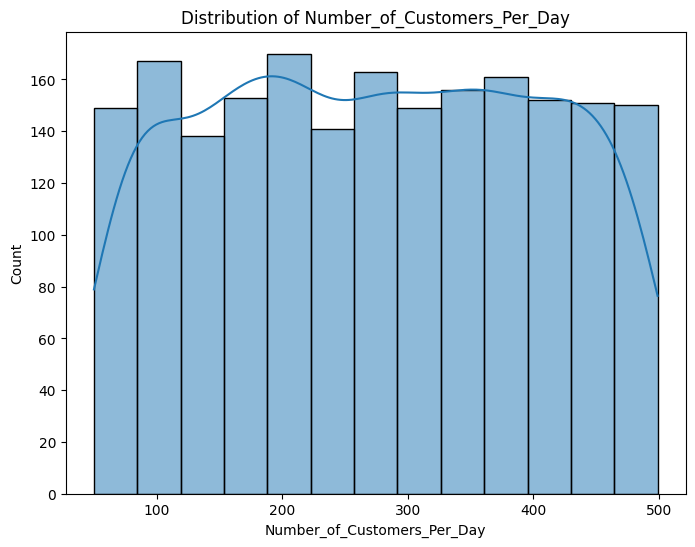

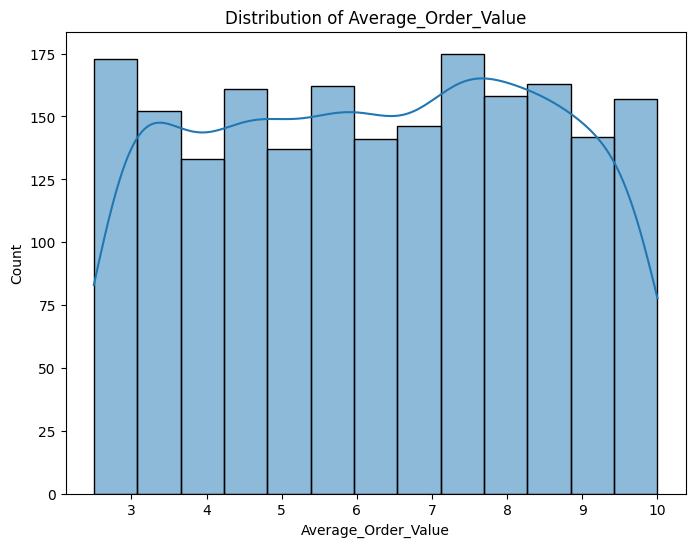

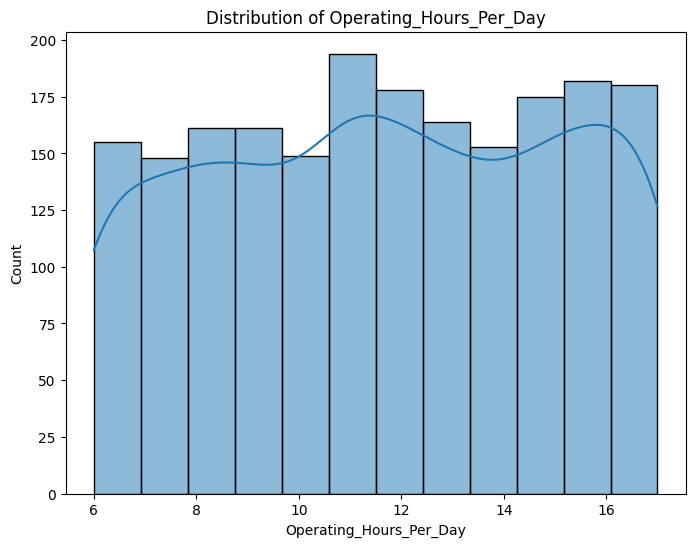

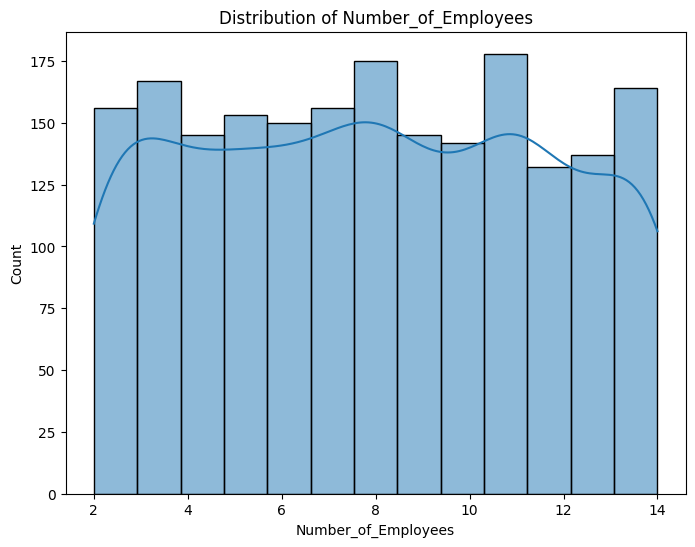

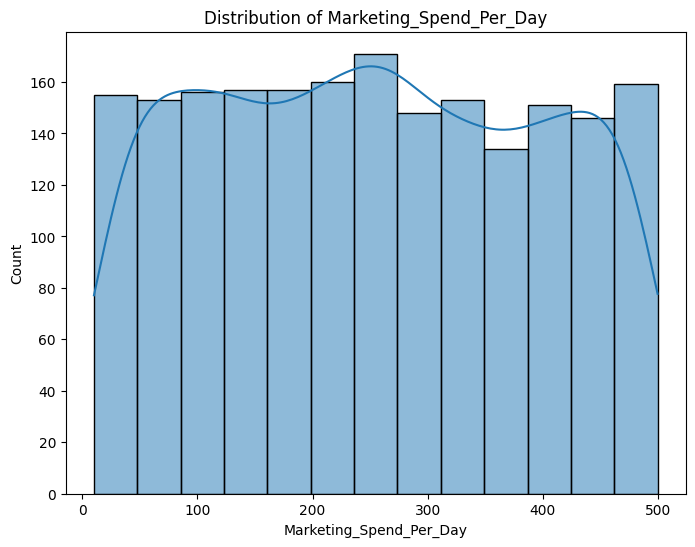

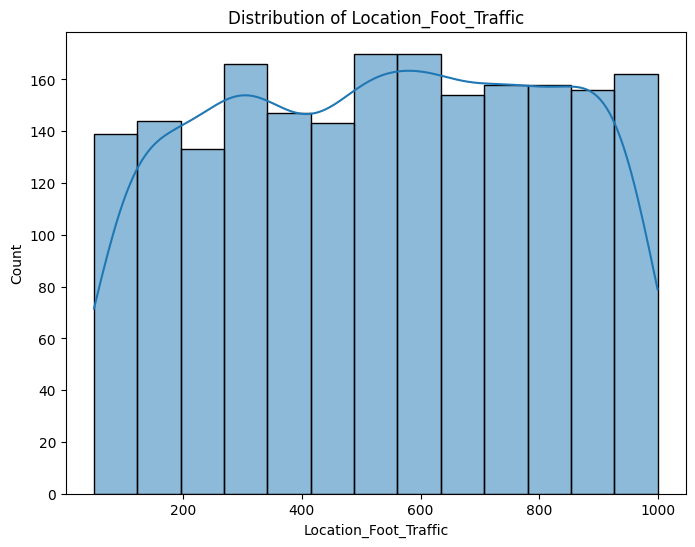

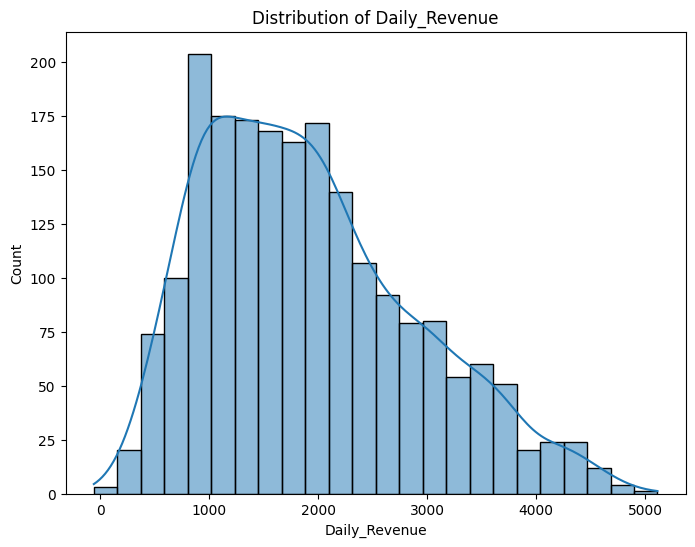

In [43]:
#Plot individual distributions for all numerical features
#Use histograms
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)


##  6. Bivariate Analysis — *[20 Marks]*
- Analyze the relationship of each independent variable with `Daily Revenue`
  - Use box plots, violin plots, scatter plots
  - Use `groupby()` for statistical summaries
- Add plots and comments

---

In [44]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


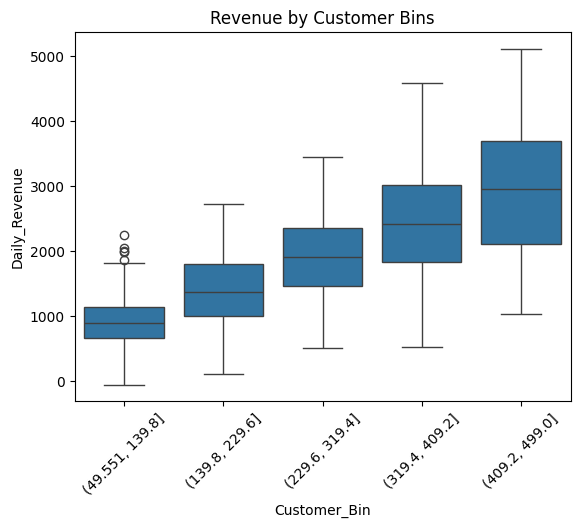

In [45]:
#Analyze the relationship of each independent variable with Daily Revenue
#Use box plots, violin plots, scatter plots

# Number_of_Customers_Per_Day vs Daily_Revenue
import matplotlib.pyplot as plt
import seaborn as sns


df['Customer_Bin'] = pd.cut(df['Number_of_Customers_Per_Day'], bins=5)

sns.boxplot(x='Customer_Bin', y='Daily_Revenue', data=df)
plt.xticks(rotation=45)
plt.title('Revenue by Customer Bins')
plt.show()

Text(0.5, 0, 'Number of Customers')

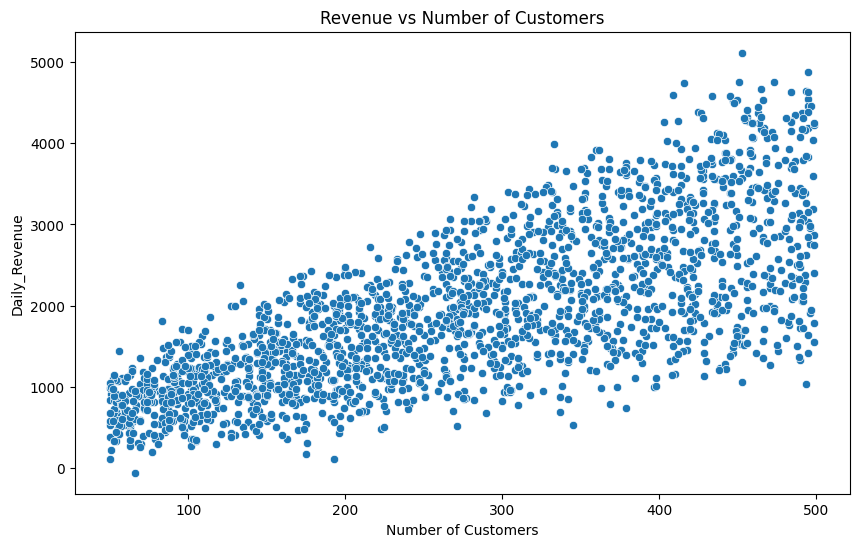

In [46]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Customers_Per_Day', y='Daily_Revenue', data=df)
plt.title('Revenue vs Number of Customers')
plt.xlabel('Number of Customers')

#As number of customers increases, Revenue increases

Text(0.5, 0, 'Operating Hours per Day')

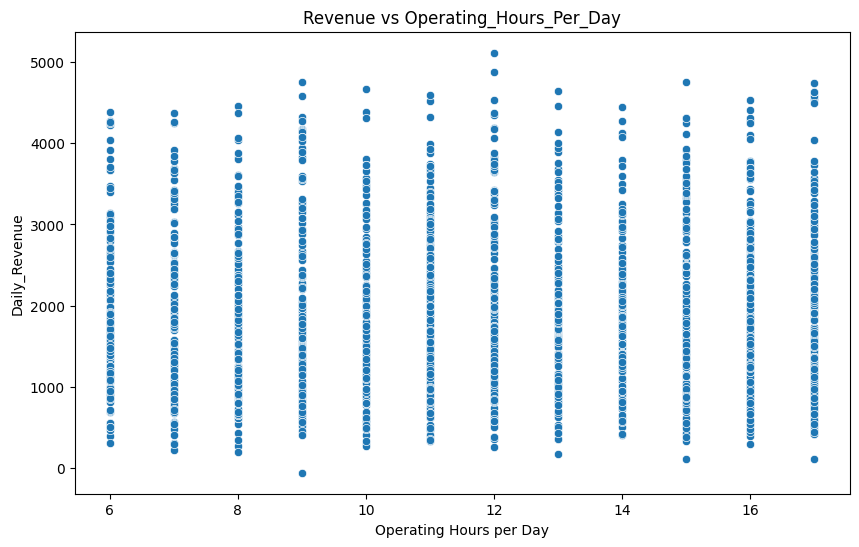

In [47]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Operating_Hours_Per_Day', y='Daily_Revenue', data=df)
plt.title('Revenue vs Operating_Hours_Per_Day')
plt.xlabel('Operating Hours per Day')

# Revenue increases with the operating hours

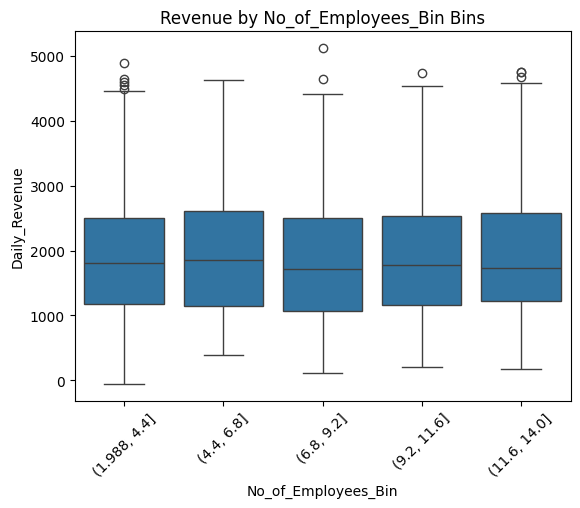

In [48]:
df['No_of_Employees_Bin'] = pd.cut(df['Number_of_Employees'], bins=5)

sns.boxplot(x='No_of_Employees_Bin', y='Daily_Revenue', data=df)
plt.xticks(rotation=45)
plt.title('Revenue by No_of_Employees_Bin Bins')
plt.show()

Text(0.5, 0, 'Number of Employees')

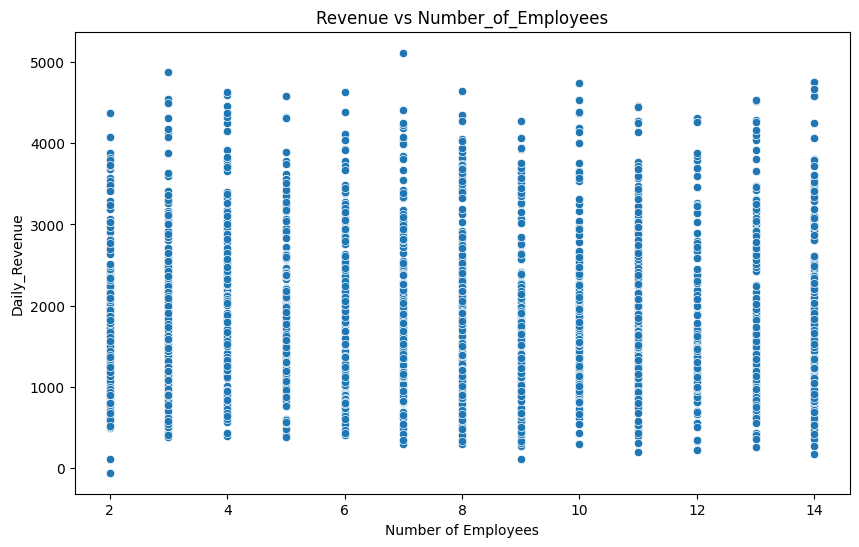

In [49]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Employees', y='Daily_Revenue', data=df)
plt.title('Revenue vs Number_of_Employees')
plt.xlabel('Number of Employees')

# No of employees do not have much impact on the Revenue

In [50]:
#Use groupby() for statistical summaries

df.groupby('Number_of_Employees')['Daily_Revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
Number_of_Employees,,,,,,,,
2,156.0,1850.392821,921.208485,-58.95,1126.8750,1721.535,2355.8050,4371.01
3,167.0,1894.754192,952.374047,379.18,1158.7450,1771.630,2433.3700,4881.00
4,145.0,2037.266897,1025.435849,399.54,1210.9000,1876.150,2704.1900,4634.73
5,153.0,1941.952549,962.062997,384.85,1171.6700,1801.500,2590.8700,4587.33
6,150.0,1975.301267,959.757094,405.39,1130.9500,1883.090,2726.1200,4626.59
7,156.0,1950.401282,1003.829566,290.59,1130.3750,1817.410,2652.4575,5114.60
8,175.0,1842.192343,1022.580684,299.11,1029.4400,1702.720,2457.3850,4646.33
9,145.0,1781.255724,979.020769,110.52,1020.8800,1554.380,2386.1500,4271.39
10,142.0,1942.847746,959.679568,289.41,1227.2950,1790.310,2398.5375,4737.16


##  7. Multivariate Analysis — *[10 Marks]*
- Use seaborn's `pairplot()` to visualize pairwise relationships
- Discuss any interesting interactions influencing revenue

---

In [51]:
#Use seaborn's pairplot() to visualize pairwise relationships
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##  8. Heatmap – Correlation Matrix — *[10 Marks]*
- Create a correlation matrix using `.corr()`
- Plot with `seaborn.heatmap()`
- Identify features most correlated with `Daily Revenue`

---

In [52]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Customer_Bin,No_of_Employees_Bin
0,152,6.74,14,4,106.62,97,1547.81,"(139.8, 229.6]","(1.988, 4.4]"
1,485,4.50,12,8,57.83,744,2084.68,"(409.2, 499.0]","(6.8, 9.2]"
2,398,9.09,6,6,91.76,636,3118.39,"(319.4, 409.2]","(4.4, 6.8]"
3,320,8.48,17,4,462.63,770,2912.20,"(319.4, 409.2]","(1.988, 4.4]"
4,156,7.44,17,2,412.52,232,1663.42,"(139.8, 229.6]","(1.988, 4.4]"


In [57]:
#Create a correlation matrix using .corr()
#heat map
# cnvert float to int
df.Average_Order_Value = df.Average_Order_Value.astype(int)
df.Location_Foot_Traffic = df.Location_Foot_Traffic.astype(int)
df.Marketing_Spend_Per_Day = df.Marketing_Spend_Per_Day.astype(int)
df.Daily_Revenue = df.Daily_Revenue.astype(int)

df.head()


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Customer_Bin,No_of_Employees_Bin
0,152,6,14,4,106,97,1547,"(139.8, 229.6]","(1.988, 4.4]"
1,485,4,12,8,57,744,2084,"(409.2, 499.0]","(6.8, 9.2]"
2,398,9,6,6,91,636,3118,"(319.4, 409.2]","(4.4, 6.8]"
3,320,8,17,4,462,770,2912,"(319.4, 409.2]","(1.988, 4.4]"
4,156,7,17,2,412,232,1663,"(139.8, 229.6]","(1.988, 4.4]"


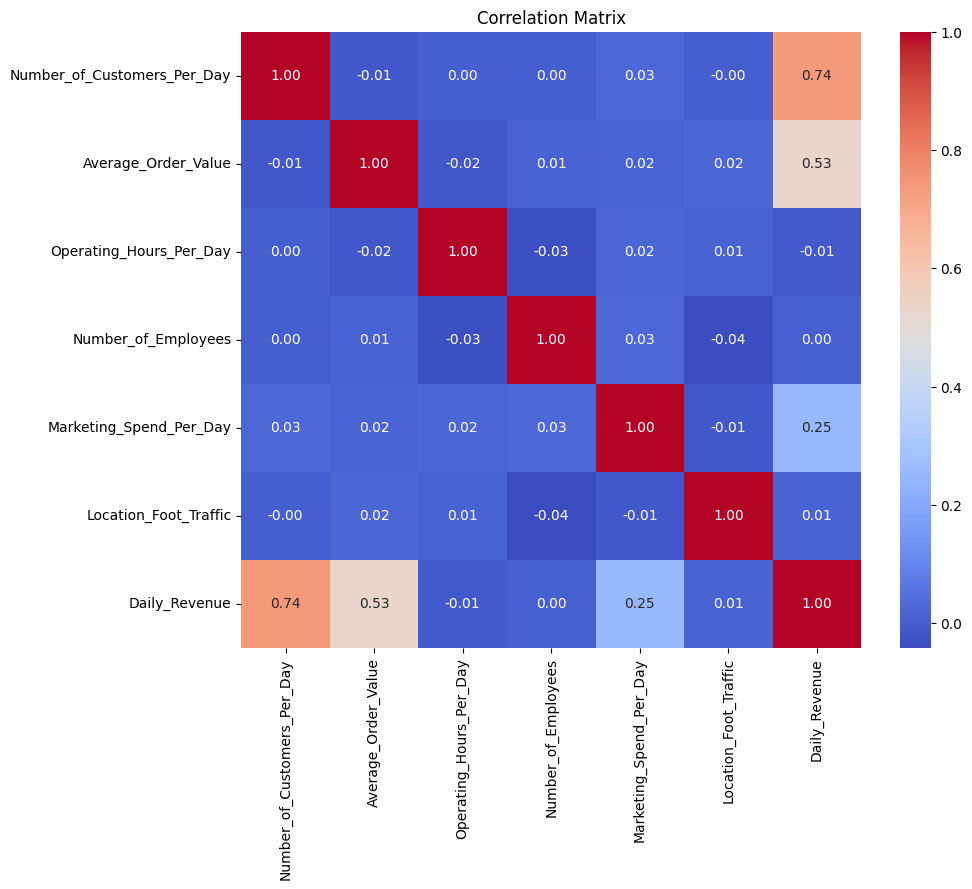

In [65]:
#df = df.drop(['Customer_Bin', 'No_of_Employees_Bin'], axis=1)

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Number of Customers and Average Order value has significant impact on the Daily Revenue

##  10. Feature Scaling — *[5 Marks]*
- Standardize or normalize the dataset using:
  - `StandardScaler` or `MinMaxScaler`
- Justify why scaling is needed before model building

---

In [ ]:
#Standardize or normalize the dataset using:
#StandardScaler or MinMaxScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler



# Standardization
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(df.drop('Daily_Revenue', axis=1))
df_standardized = pd.DataFrame(X_standardized, columns=df.drop('Daily_Revenue', axis=1).columns)
df_standardized['Daily_Revenue'] = df['Daily_Revenue']

# Normalization
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(df.drop('Daily_Revenue', axis=1))
df_normalized = pd.DataFrame(X_normalized, columns=df.drop('Daily_Revenue', axis=1).columns)
df_normalized['Daily_Revenue'] = df['Daily_Revenue']



🔹 StandardScaler (Standardization)
Purpose: Transforms features to have a mean of 0 and a standard deviation of 1.

🔹 MinMaxScaler (Normalization)
Purpose: Scales features to a specific range, typically [0, 1].

In [ ]:
#Justify why scaling is needed before model building



##  11. Model Building — *[50 Marks]*
Implement the following **regression models**:

1. **Linear Regression**
2. **K-Nearest Neighbors Regressor (KNN)**
3. **Decision Tree Regressor**
4. **Support Vector Regressor (SVR)**
5. **Random Forest Regressor**
6. **Bagging Regressor**
7. **AdaBoost Regressor**
8. **Gradient Boosting Regressor**
9. **XGBoost Regressor**
10. **Stacking Regressor**
11. **Voting Regressor**
12. **Neural Network Regressor** (`MLPRegressor` or using `Keras`)



---

In [76]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, BaggingRegressor, AdaBoostRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
)
from xgboost import XGBRegressor


X = df.drop(columns=['Daily_Revenue'])
y = df['Daily_Revenue']

# Data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base regressors
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
}

# Stacking and Voting
stacking = StackingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
], final_estimator=LinearRegression())

voting = VotingRegressor(estimators=[
    ("rf", RandomForestRegressor()),
    ("gb", GradientBoostingRegressor()),
    ("xgb", XGBRegressor())
])

# Add ensemble models
models["Stacking"] = stacking
models["Voting"] = voting

# Evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} - MSE: {mse:.4f}")
    mae = mean_absolute_error(y_test, preds)
    print(f"{name} - MAE: {mse:.4f}")
    rmse = np.sqrt(mse)
    print(f"{name} - RMSE: {mse:.4f}")
    r2 = r2_score(y_test, preds)
    print("R-squared Score:", r2)


Linear Regression - MSE: 0.0094
Linear Regression - MAE: 0.0094
Linear Regression - RMSE: 0.0094
R-squared Score: 0.9999996959438721
KNN - MSE: 10501.2063
KNN - MAE: 10501.2063
KNN - RMSE: 10501.2063
R-squared Score: 0.6602651378273239
Decision Tree - MSE: 14478.7619
Decision Tree - MAE: 14478.7619
Decision Tree - RMSE: 14478.7619
R-squared Score: 0.531583318961678
SVR - MSE: 28228.7544
SVR - MAE: 28228.7544
SVR - RMSE: 28228.7544
R-squared Score: 0.0867437774427231
Random Forest - MSE: 4343.7915
Random Forest - MAE: 4343.7915
Random Forest - RMSE: 4343.7915
R-squared Score: 0.8594697240142779
Bagging - MSE: 5128.9767
Bagging - MAE: 5128.9767
Bagging - RMSE: 5128.9767
R-squared Score: 0.8340674250373912
AdaBoost - MSE: 6125.8416
AdaBoost - MAE: 6125.8416
AdaBoost - RMSE: 6125.8416
R-squared Score: 0.8018168689068951
Gradient Boosting - MSE: 2190.1425
Gradient Boosting - MAE: 2190.1425
Gradient Boosting - RMSE: 2190.1425
R-squared Score: 0.9291445441869108
XGBoost - MSE: 3519.1224
XGBoo

##  12. Model Evaluation — *[20 Marks]*
Evaluate all models using:
- **MAE** (Mean Absolute Error)
- **MSE** (Mean Squared Error)
- **RMSE**
- **R² Score**

 Create a comparison plot of model performances.

---

| Model             | MAE         | MSE         | RMSE        | R² Score      |
| ----------------- | ----------- | ----------- | ----------- | ------------- |
| Linear Regression | **0.0094**  | **0.0094**  | **0.0094**  | **0.9999997** |
| KNN               | 10501.21    | 10501.21    | 10501.21    | 0.6603        |
| Decision Tree     | 14478.76    | 14478.76    | 14478.76    | 0.5316        |
| SVR               | 28228.75    | 28228.75    | 28228.75    | 0.0867        |
| Random Forest     | 4343.79     | 4343.79     | 4343.79     | 0.8595        |
| Bagging           | 5128.98     | 5128.98     | 5128.98     | 0.8341        |
| AdaBoost          | 6125.84     | 6125.84     | 6125.84     | 0.8018        |
| Gradient Boosting | 2190.14     | 2190.14     | 2190.14     | 0.9291        |
| XGBoost           | 3519.12     | 3519.12     | 3519.12     | 0.8861        |
| Stacking          | **1819.34** | **1819.34** | **1819.34** | **0.9411**    |
| Voting            | 2732.77     | 2732.77     | 2732.77     | 0.9116        |


✅ 1. Linear Regression
MAE / MSE / RMSE: 0.0094 — exceptionally low error

R² Score: 0.9999997 — near-perfect fit

📌 Likely indicates overfitting or a simple relationship well captured linearly.

✅ 2. Stacking
MAE / RMSE: 1819.34 — best among ensemble and non-linear models

R² Score: 0.9411 — excellent variance explanation

✅ 3. Gradient Boosting
MAE / RMSE: 2190.14

R² Score: 0.9291 — strong performance, close to stacking

🔻 Worst Performing Models

❌ 1. SVR
MAE / RMSE: 28228.75

R² Score: 0.0867 — extremely poor fit

❌ 2. Decision Tree
MAE / RMSE: 14478.76

R² Score: 0.5316 — weak generalization

❌ 3. KNN
MAE / RMSE: 10501.21

R² Score: 0.6603 — better than SVR and DT, but still underwhelming



##  13. Interpretation of Metrics — *[10 Marks]*
- Explain what each metric means
- Discuss pros and cons of MAE vs RMSE
- Which metric is most relevant for predicting business revenue?

---

✅ MAE (Mean Absolute Error)
Definition:
Average of the absolute differences between predicted and actual values.

✅ Pros:
Robust to outliers: Errors are treated linearly, so large errors do not have an outsized influence.

Interpretability: MAE is in the same units as the data and is easy to interpret (average error).

Simple and intuitive: Useful when you care equally about all errors regardless of magnitude.

❌ Cons:
Not sensitive to large errors: Treats all errors equally, so it doesn’t penalize large deviations more harshly.

Not differentiable at zero: Can be a minor issue for certain optimization algorithms.

✅ RMSE (Root Mean Squared Error)
Definition:
Square root of the average of squared differences between predicted and actual values.

✅ Pros:
Penalizes large errors more: Squaring emphasizes larger errors, which is useful when large mistakes are especially bad.

Widely used in many applications: Especially where large deviations are critical (e.g., weather prediction, finance).

Smooth and differentiable: More suitable for gradient-based optimization.

❌ Cons:
Sensitive to outliers: A single large error can disproportionately affect RMSE.

Less interpretable: Though it shares the unit with the data, squaring and rooting can make interpretation less intuitive than MAE.

🤔 When to Use Which?

| Scenario                           | Prefer   |
| ---------------------------------- | -------- |
| All errors equally important       | **MAE**  |
| Large errors more costly           | **RMSE** |
| Outliers present                   | **MAE**  |
| Optimization with gradient descent | **RMSE** |



##  14. Final Conclusion — *[10 Marks]*
- Which model performed best and why?
- What could improve the performance? (e.g., more data, better features, hyperparameter tuning)

---



✅ Linear Regression
RMSE / MAE / MSE: ~0.0094 — nearly perfect predictions

R² Score: 0.9999997 — explains almost all variance in the target

Why it performed best:

Your data likely has a strong linear relationship between features and the target.

Possibly clean, well-scaled data with minimal noise or outliers.

Linear Regression can outperform complex models when the underlying trend is linear — simple models generalize better in such cases.